<h1><center> Zeroinfl </center></h1>
    
<h2><center>A python package for Zero Inflated Regression</center></h2>

<h3><center> STAT 689 Course Project Spring '18 </center></h3>

<br>
<br>
<br>
<br>
<br>
<br>

<center>Eric Chuu,
Rajan Kapoor</center>
<br>
<br>
<br>
<br>
<br>
<br>
Project Repo: [github.com/rkapr/zeroinfl](https://github.com/rkapr/zeroinfl) <br>
Presentation: [rkapr.github.io/zeroinfl](https://rkapr.github.io/zeroinfl)/

4/11/2018  

# Outline

<h1>  -  Introduction </h1>
##  -  ZIP Model Specifications
##  -  Algorithm flowchart
##  -  Classes and Methods
##  -  Usage
##  -  Results
##  -  To Do


# Introduction: 

## Poisson Regression

### Assumptions:

* $y_i \textrm{ } \big| \textrm{ } x_i \sim \mathrm{Poisson}$:
$$P \left( Y_i = y_i \textrm{ } | \textrm{ } x_i \right) = \frac{\exp(-\mu_i) \cdot \mu_i^{y_i}}{y_i!} \cdot \mathbb{1} \left( y_i \in \{0, 1, 2, \ldots \} \right), \quad \mu_i = \exp \left( x_i' \beta \right) $$


* Equidispersion: 
$$E \left( Y_i \textrm{ } \big| \textrm{ } x_i\right) = \mu_i = Var \left( Y_i \textrm{ } \big| \textrm{ } x_i \right)$$


## Count Data in Different Fields

### Number of House and Senate Actions Taken in Response to Supreme Court Decisions (1979-88)
See paper [here](http://journals.sagepub.com/doi/pdf/10.1177/0049124198026003004)
![](supreme_ct.png)









### Education
* Modeling the number of courses failed in 2008-2009 at Iran University of Medical Sciences (See paper [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4764272/))

![](fail.png)

### Software Analysis

* Modeling the number of faults in a source file during system tests (See paper [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=989459)).

![](faults.png)

## Zero Inflated Poisson Regression

### Idea: zeros in the data are generated by a separate process that can be modeled independently

* Poisson Count Model
* Zero Inflated Model



# Outline

##  -  ~~Introduction~~
<h1> - ZIP Model Specifications </h1>
##  -  Algorithm flowchart
##  -  Classes and Methods 
##  -  Usage
##  -  Results
##  -  To Do

# ZIP Model Specifications


### Data is generated by one of two processes, with each process chosen with probability $\varphi_i$.

$ y_i = \begin{cases}
    0      \quad &\textrm{with probability $\varphi_i$} \\
    g(y_i) \quad &\textrm{with probability 1 - $\varphi_i$} 
\end{cases}
$

### This gives us the following probability mass function:

$ P\left(Y_i = y_i \textrm{ } \big| \textrm{ } x_i, z_i \right) = \begin{cases}
    \varphi_i + (1 - \varphi_i) \cdot \exp(-\mu_i)      \quad &\textrm{if $y_i = 0$} \\
    (1 - \varphi_i) \cdot \exp(-\mu_i) \cdot \mu_i^{y_i} \big/ y_i! \quad &\textrm{if $y_i > 0$} 
\end{cases}
$


* $\varphi_i = F_i = F\left(z_i' \gamma\right)$ is the link function
* $x_i$ is the vector of covariates for the count model
* $z_i$ is the vector of covariates for the zero inflation model
* $\gamma$ is the vector of zero inflation coefficients
* $\mu_i = \exp{x_i' \beta}$, where $\beta$ is the vector of coefficients for the count model


# ZIP Model Specifications


### Expectation and Variance Calculations

* $E \left( Y_i \textrm{ } \big| \textrm{ } x_i, z_i \right) = \mu_i \cdot (1 - \varphi_i)$
* $Var\left(Y_i \textrm{ } \big| \textrm{ } x_i, z_i\right) = E\left( Y_i \textrm{ } \big| \textrm{ } x_i, z_i \right) (1 + \mu_i \varphi_i) > E \left( Y_i \textrm{ } \big| \textrm{ } x_i, z_i \right)$

### Log-likelihood can then be written in a general form:

$$ \mathcal{L} = \sum_{i=1}^n w_i \log \left[ P\left( y_i \textrm{ } \big| \textrm{ } x_i, z_i  \right) \right] $$

* Exact form of log-likelihood arises when link function chosen 
* Maximize this with Newton-Raphson or EM

#### (Zero Inflated) Negative Binomial, Geometric Regression are other options that may better handle overdispersion


# Outline

##  -  ~~Introduction~~
##  -  ~~ZIP Model Specifications~~
<h1> - Algorithm flowchart </h1>
##  -  Classes and Methods 
##  -  Usage
##  -  Results
##  -  To Do

# Algorithm flowchart
![](flowchart.png)

# Outline

##  -  ~~Introduction~~
##  -  ~~ZIP Model Specifications~~
##  -  ~~Algorithm flowchart~~
<h1> - Classes and Methods </h1>
##  -  Usage
##  -  Results
##  -  To Do

# Classes and Methods

 - LinkClass
   - Instance Methods: link, link_inv, link_inv_deriv
 - Classes Inheriting LinkClass: Logit, Probit, CLogLog, Cauchit, Log
 - ZeroInflated
    - Instance Methods:
      - ziPoisson, ziNegBin, ziGeom
      - gradPoisson, gradNegBin, gradGeom
      - EM_estimate
      - fit
      - setter methods
    - Static Methods:
      - convert_params
      - argument processing methods (dist, formula, link)
 - ZeroInflatedResults
    - Instance methods: summary, printModel, predict, vcov 

# Outline

##  -  ~~Intro: Zero Inflation~~
##  -  ~~ZIP Model Specifications~~
##  -  ~~Algorithm flowchart~~
##  -  ~~Classes and Methods~~
<h1> - Usage </h1>
##  -  Results
##  -  To Do

# Usage

#### ZeroInflated(formula_str, df, params): 
 - Creates an instance of class ZeroInflated.
 - Default params: dist = 'poisson', link = 'logit'

#### ZeroInflated(formula_str, df).fit(params): 
 - Returns an instance of class ZeroInflatedResults.
 - Default params: EM = True, method = BFGS
 
#### ZeroInflated(formula_str, df).EM_estimate():
 - Returns EM estimates of model as dict of pandas series.

#### ZeroInflated(formula_str, df).fit(params).method:
 - method = summary, printModel, predict, vcov


# Example dataset: DebTrivedi 

### Model for demand for medical care by elderly ([ref.](http://cran.revolutionanalytics.com/web/packages/pscl/vignettes/countreg.pdf)):
 - 4406 indivduals aged 66 and above covered by medicare ('87/88 survey)
 - Model demand for medicare: # of physician/non physician office and hospital visits ofp
 - covariates for patients: 
   - hosp : # of hospital stays
   - health: self perceived health status
   - numchron: # of chronic conditions
   - privins: private insurance indicator
   - gender
   - school

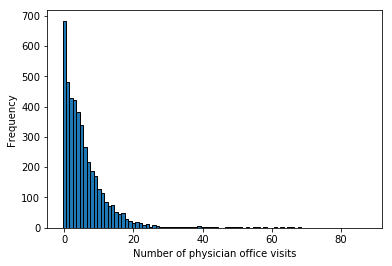

In [4]:
from zeroinfl import *


import numpy as np
import pandas as pd
from pandas.core import datetools

df = pd.read_csv('DebTrivedi.csv',index_col = [0])
sel = np.array([1, 6, 7, 8, 13, 15, 18])-1
df = df.iloc[:,sel]

formula_str = 'ofp ~ hosp + health + numchron + gender + school + privins | health'

import matplotlib.pyplot as plt
data_ofp = df.iloc[:,0].values.astype(int)
plt.hist(data_ofp, bins=np.arange(data_ofp.min(), data_ofp.max()), align = 'left', ec='black')
plt.xlabel('Number of physician office visits');plt.ylabel('Frequency')
plt.show()

# Usage: fit()

In [5]:
ZeroInflated(formula_str, df).fit()

Call:
    ZeroInflated(formula_str='ofp ~ hosp + health + numchron + gender + school + privins | health', data=df, dist='poisson', offsetx=None, offsetz=None, link='logit', weights=None, missing='none')

formula:
    ofp ~ hosp + health + numchron + gender + school + privins | health
dist: poisson
link: logit
linkobj:
    linkstr: logit
    link: log(p/(1-p))
    linkinv: exp(eta)/(1+exp(eta))
Message: Optimization terminated successfully.
Result: 
    Count:
Intercept              1.393671948862
health[T.excellent]   -0.307753660409
health[T.poor]         0.254201322909
gender[T.male]        -0.064859143868
privins[T.yes]         0.085441066716
hosp                   0.159127058413
numchron               0.103280224020
school                 0.019591000079
dtype: float64
    Zero:
Intercept             -1.733641644220
health[T.excellent]    0.474905518428
health[T.poor]        -0.399155782468
dtype: float64 
df_null: 4404 
df_resid: 4395

# Usage: printModel()

In [6]:
ZeroInflated(formula_str, df).fit().printModel()


Call:
ZeroInflated(formula_str='ofp ~ hosp + health + numchron + gender + school + privins | health', data=df, dist='poisson', offsetx=None, offsetz=None, link='logit', weights=None, missing='none')

Count model cefficients (poisson log link): 
  Intercept health[T.excellent] health[T.poor] gender[T.male] privins[T.yes]  \
    1.39367            -0.30775        0.25420       -0.06486        0.08544   

      hosp numchron   school  
   0.15913  0.10328  0.01959  


Zero-inflation model coefficients (binomial with logit link): 
  Intercept health[T.excellent] health[T.poor]
   -1.73364             0.47491       -0.39916


# Results from pscl package in R: print()

<h2>Results from pscl package in R: print()</h2>
<pre>
> model &lt;- pscl::zeroinfl(ofp ~ health+gender+privins+hosp+numchron+school| health,
  data = dt, dist = 'poisson')
> print(model)
Call:
pscl::zeroinfl(formula = ofp ~ health + gender + privins + hosp + numchron + school | health,
    data = dt, dist = "poisson")

Count model coefficients (poisson with log link):
  (Intercept)   healthpoor  healthexcellent   gendermale   privinsyes     hosp  
      1.39367      0.25420         -0.30775     -0.06486      0.08544  0.15913  
     numchron       school  
      0.10328      0.01959  

Zero-inflation model coefficients (binomial with logit link):
    (Intercept)       healthpoor  healthexcellent  
        -1.7336          -0.3992           0.4749 
</pre>

# Usage: summary()

In [4]:
ZeroInflated(formula_str, df).fit().summary()


Call:
ZeroInflated(formula_str='ofp ~ hosp + health + numchron + gender + school + privins | health', data=df, dist='poisson', offsetx=None, offsetz=None, link='logit', weights=None, missing='none')

Pearson residuals:
       Min        1Q    Median        3Q       Max
 -28.81532  -3.64394  -1.42507   1.97142  72.65782


Count model cefficients (poisson log link): 
                    |  Estimate|Std. Error|   z value|  Pr(>|z|)
----------------------------------------------------------------
           Intercept|    1.3937|    0.0245|     56.86|    <2e-16
 health[T.excellent]|   -0.3078|    0.0314|    -9.791|    <2e-16
      health[T.poor]|    0.2542|    0.0177|    14.339|    <2e-16
      gender[T.male]|   -0.0649|    0.0131|    -4.946| 7.5608e-7
      privins[T.yes]|    0.0854|    0.0173|     4.936| 7.9923e-7
                hosp|    0.1591|    0.0061|    26.262|    <2e-16
            numchron|    0.1033|    0.0047|    21.805|    <2e-16
              school|    0.0196|    0.0019|   

# Results from pscl package in R: summary()

<h3>Results from pscl package in R: summary()</h3>
<pre>> summary(model)
Call:
pscl::zeroinfl(formula = ofp ~ health + gender + privins + hosp + numchron + 
    school | health, data = dt, dist = "poisson")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-2.5417 -1.2132 -0.4612  0.5889 25.1526 

Count model coefficients (poisson with log link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.393672   0.024506  56.870  < 2e-16 ***
healthpoor       0.254201   0.017726  14.340  < 2e-16 ***
healthexcellent -0.307754   0.031428  -9.792  < 2e-16 ***
gendermale      -0.064859   0.013111  -4.947 7.54e-07 ***
privinsyes       0.085441   0.017310   4.936 7.97e-07 ***
hosp             0.159127   0.006059  26.262  < 2e-16 ***
numchron         0.103280   0.004736  21.806  < 2e-16 ***
school           0.019591   0.001885  10.395  < 2e-16 ***

Zero-inflation model coefficients (binomial with logit link):
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.73364    0.04809 -36.050  < 2e-16 ***
healthpoor      -0.39916    0.14655  -2.724  0.00646 ** 
healthexcellent  0.47490    0.14542   3.266  0.00109 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Number of iterations in BFGS optimization: 17 
Log-likelihood: -1.629e+04 on 11 Df</pre>

# Outline

## - ~~Introduction~~
## - ~~ZIP Model Specifications~~
## - ~~Algorithm flowchart~~
## - ~~Classes and Methods~~
## - ~~Usage~~
<h1> - Results</h1>
##  -  To Do

# Results

#### Zero Inflated Poisson: logit link

<table>
  <tr>
    <th>Count:</th>
    <th>Python</th> 
    <th>R</th>
  </tr>
  <tr>
    <th>Intercept</th>
    <th><b>1.39367</th> 
    <th><b>1.39367</th>
  </tr>
  <tr>
    <th>health[T.excellent]</th>
    <th><b>-0.30775</th> 
    <th><b>-0.30775</th>
  </tr>
  <tr>
    <th>health[T.poor]</th>
    <th><b>0.25420</th> 
    <th><b>0.25420</th>
  </tr>
  <tr>
    <th>gender[T.male]</th>
    <th><b>-0.06486</th> 
    <th><b>-0.06486</th>
  </tr>
  <tr>
    <th>privins[T.yes]</th>
    <th><b>0.08544</th> 
    <th><b>0.08544</th>
  </tr>
  <tr>
    <th>hosp</th>
    <th><b>0.15913</th> 
    <th><b>0.15913</th>
  </tr>
  <tr>
    <th>numchron</th>
    <th><b>0.10328</th> 
    <th><b>0.10328</th>
  </tr>
  <tr>
    <th>school</th>
    <th><b>0.01959</th> 
    <th><b>0.01959</th>
  </tr>
</table> 
<table>
  <tr>
    <th>Zero:</th>
    <th>Python</th> 
    <th>R</th>
  </tr> 
  <tr>
    <th>Intercept</th>
    <th><b>-1.73364</th> 
    <th><b>-1.73364</th>
  </tr>
  <tr>
    <th>health[T.excellent]</th>
    <th><b>0.47490</th> 
    <th><b>0.47489</th>
  </tr>
  <tr>
    <th>health[T.poor]</th>
    <th><b>-0.39916</th> 
    <th><b>-0.39916</th>
  </tr>
 </table>

In [ ]:
1+1

<pre>
     Count:                Python                R
Intercept              <b>1.39367</b>1948862    <b>1.39367</b>0893326 <br>
health[T.excellent]   <b>-0.30775</b>3660409   <b>-0.30775</b>7302953 <br>
health[T.poor]         <b>0.2542013</b>22909    <b>0.2542013</b>58538 <br>
gender[T.male]        <b>-0.064859</b>143868   <b>-0.064859</b>352279 <br>
privins[T.yes]         <b>0.085441</b>066716    <b>0.085441</b>351362 <br>
hosp                   <b>0.1591270</b>58413    <b>0.1591270</b>73461 <br>
numchron               <b>0.103280</b>224020    <b>0.103280</b>340077 <br>
school                 <b>0.0195910</b>00079    <b>0.0195910</b>78569 <br>
    Zero:
Intercept             <b>-1.73364</b>1644220   <b>-1.73364</b>2401609 <br>
health[T.excellent]    <b>0.474</b>905518428    <b>0.474</b>886145700 <br>
health[T.poor]        <b>-0.399155</b>782468   <b>-0.399155</b>156555 <br>
</pre> 

# Results

#### Zero Inflated Geometric: logit link

<table>
  <tr>
    <th>Count:</th>
    <th>Python</th> 
    <th>R</th>
  </tr>
  <tr>
    <th>Intercept</th>
    <th><b>0.92523</th> 
    <th><b>0.92523</th>
  </tr>
  <tr>
    <th>health[T.excellent]</th>
    <th><b>-0.34160</th> 
    <th><b>-0.34160</th>
  </tr>
  <tr>
    <th>health[T.poor]</th>
    <th><b>0.31351</th> 
    <th><b>0.31352</th>
  </tr>
  <tr>
    <th>gender[T.male]</th>
    <th><b>-0.12678</th> 
    <th><b>-0.12678</th>
  </tr>
  <tr>
    <th>privins[T.yes]</th>
    <th><b>0.22483</th> 
    <th><b>0.22483</th>
  </tr>
  <tr>
    <th>hosp</th>
    <th><b>0.22057</th> 
    <th><b>0.22057</th>
  </tr>
  <tr>
    <th>numchron</th>
    <th><b>0.17603</th> 
    <th><b>0.17603</th>
  </tr>
  <tr>
    <th>school</th>
    <th><b>0.02689</th> 
    <th><b>0.02689</th>
  </tr>
</table> 
<table>
  <tr>
    <th>Zero:</th>
    <th>Python</th> 
    <th>R</th>
  </tr> 
  <tr>
    <th>Intercept</th>
    <th><b>-24.34361</th> 
    <th><b>-24.33868</th>
  </tr>
  <tr>
    <th>health[T.excellent]</th>
    <th><b>10.00308</th> 
    <th><b>9.99858</th>
  </tr>
  <tr>
    <th>health[T.poor]</th>
    <th><b>19.44489</th> 
    <th><b>19.43996</th>
  </tr>
 </table>

<pre>
[1] "coefc"
      (Intercept)        healthpoor   healthexcellent        gendermale        privinsyes 
 "0.925231667760"  "0.313515063145" "-0.341604225196" "-0.126783064898"  "0.224834857091" 
             hosp          numchron            school 
 "0.220568006945"  "0.176031530196"  "0.026889883133" 
[1] "coefz"
       (Intercept)         healthpoor    healthexcellent 
"-24.338681295277"  "19.439964441846"   "9.998584332354" 

Intercept              0.925231667776
health[T.excellent]   -0.341604225401
health[T.poor]         0.313515063204
gender[T.male]        -0.126783064877
privins[T.yes]         0.224834857129
hosp                   0.220568006986
numchron               0.176031530270
school                 0.026889883630
dtype: float64
    Zero:
Intercept             -24.343611162596
health[T.excellent]    10.003075597691
health[T.poor]         19.444894315458
</pre>

<table style="float: left;">

# Results

#### Zero Inflated Negative Binomial: logit link


<table>
  <tr>
    <th>Count:</th>
    <th>Python</th> 
    <th>R</th>
  </tr>
  <tr>
    <th>Intercept</th>
    <th><b>0.94181</th> 
    <th><b>0.94206</th>
  </tr>
  <tr>
    <th>health[T.excellent]</th>
    <th><b>-0.32944</th> 
    <th><b>-0.32945</th>
  </tr>
  <tr>
    <th>health[T.poor]</th>
    <th><b>0.32891</th> 
    <th><b>0.32884</th>
  </tr>
  <tr>
    <th>gender[T.male]</th>
    <th><b>-0.12468</th> 
    <th><b>-0.12465</th>
  </tr>
  <tr>
    <th>privins[T.yes]</th>
    <th><b>0.21839</th> 
    <th><b>0.21832</th>
  </tr>
  <tr>
    <th>hosp</th>
    <th><b>0.22252</th> 
    <th><b>0.22250</th>
  </tr>
  <tr>
    <th>numchron</th>
    <th><b>0.17366</th> 
    <th><b>0.17363</th>
  </tr>
  <tr>
    <th>school</th>
    <th><b>0.02667</th> 
    <th><b>0.02667</th>
  </tr>
  <tr>
    <th>theta</th>
    <th><b>1.25876</th> 
    <th><b>1.25925</th>
  </tr>
</table> 
<table>
  <tr>
    <th>Zero:</th>
    <th>Python</th> 
    <th>R</th>
  </tr> 
  <tr>
    <th>Intercept</th>
    <th><b>-5.04317</th> 
    <th><b>-5.02321</th>
  </tr>
  <tr>
    <th>health[T.excellent]</th>
    <th><b>1.08234</th> 
    <th><b>1.06984</th>
  </tr>
  <tr>
    <th>health[T.poor]</th>
    <th><b>1.61952</th> 
    <th><b>1.60087</th>
  </tr>
 </table>
  

<pre>

[1] "coefc"
      (Intercept)        healthpoor   healthexcellent        gendermale        privinsyes 
 "0.942057654663"  "0.328837434988" "-0.329449197037" "-0.124653450217"  "0.218318709658" 
             hosp          numchron            school 
 "0.222499553909"  "0.173632997381"  "0.026670468563" 
[1] "coefz"
      (Intercept)        healthpoor   healthexcellent 
"-5.023207307752"  "1.600869449193"  "1.069841367704" 

1.259252

Count:
Intercept              0.941806420063
health[T.excellent]   -0.329441603517
health[T.poor]         0.328911163875
gender[T.male]        -0.124682074792
privins[T.yes]         0.218385934913
hosp                   0.222516202169
numchron               0.173664131132
school                 0.026673431561
dtype: float64
    Zero:
Intercept             -5.043170380636
health[T.excellent]    1.082340977632
health[T.poor]         1.619517646169
dtype: float64
    theta: 1.258759013055
    
</pre>

# Results

#### EM Estimates : Negative Binomial - logit link

<pre>

X(Intercept)      Xhealthpoor Xhealthexcellent      Xgendermale      Xprivinsyes            Xhosp 
      0.94205767       0.32883744      -0.32944920      -0.12465344       0.21831872       0.22249956 
       Xnumchron          Xschool      (Intercept)       healthpoor  healthexcellent                  
      0.17363302       0.02667065      -5.02320729       1.60086945       1.06984137       1.25925174 

'count': Intercept              0.954974381655
 health[T.excellent]   -0.327874794327
 health[T.poor]         0.326516269194
 gender[T.male]        -0.123146816220
 privins[T.yes]         0.214741701073
 hosp                   0.221704399479
 numchron               0.171967040735
 school                 0.026517080356
 dtype: float64,
 'theta': 1.3041686363328413,
 'zero': Intercept             -4.346081634494
 health[T.excellent]    0.779900134789
 health[T.poor]         1.028712964862
 
 
 {'count': Intercept              0.955026768001
 health[T.excellent]   -0.328340961291
 health[T.poor]         0.326467123313
 gender[T.male]        -0.123137317112
 privins[T.yes]         0.214724028049
 hosp                   0.221700415560
 numchron               0.171962400311
 school                 0.026519172037
 dtype: float64,
 'theta': 1.3041521885175773,
 'zero': Intercept             -4.341598946074
 health[T.excellent]    0.759895412523
 health[T.poor]         1.024220944035
 dtype: float64}
 
 </pre>

# Outline

## - ~~Introduction~~
## - ~~ZIP Model Specifications~~
## - ~~Algorithm flowchart~~
## - ~~Classes and Methods~~
## - ~~Usage~~
## - ~~Results~~
<h1> - To Do</h1>


- Major:
  - Summary statistics, predict()
  - Vuong's Test
  - Testing on 4 more datasets
- Minor:
  - Dealing with missing values
  - Functions docs
  - Use standard names for ZeoInflatedResults class attributes 
    (eg from python glm results class names)
- Exploring:
  - Should ZeroInflatedResults class be inherited from ZeroInflated class
  - Should ZeroInflated class be inherited from Loglikelihood class
- Future:
  - Regularized optimization for ZIP, ZINB, ZIG
  - Negative Binomial regression with joint estimation of theta and mu with variable weights.
  - Use above for optimal EM estimation of starting values for ZINB.

from current Slides folder, in terminal:

jupyter nbconvert Slides.ipynb --to slides --post serve

http://nbconvert.readthedocs.io/en/latest/usage.html for 

jupyter nbconvert Slides.ipynb --to slides

then move it to main folder to check

To change on project website, rename it to index.html and push.